In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
import sys
if '/content/gdrive/My Drive/Colab Notebooks/ABELE/ABELE_master' not in sys.path:
  sys.path.append('/content/gdrive/My Drive/Colab Notebooks/ABELE/ABELE_master')

In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Feb  9 18:15:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
!pip install -q tensorflow==2.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.3 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
bigframes 1.34.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
scikit-image 0

In [6]:
from keras.preprocessing.image import ImageDataGenerator
import sklearn.datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import os

import tensorflow
print(tensorflow.__version__)

2.12.0


# Training

In [7]:
!pip install -q tensorflow_addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 32.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
!pip install -q emnist

In [15]:
!cd gdrive/Shareddrives/

In [16]:
!ls

gdrive	sample_data


In [11]:

from datetime import datetime

import keras.backend as K
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Lambda, Flatten, Reshape
from keras.layers import LeakyReLU
from keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, BatchNormalization, Activation

from tensorflow.keras.utils import plot_model
from keras.datasets import mnist

from abc import abstractmethod

from autoencoders.autoencoder import Autoencoder
from autoencoders.adversarial import AdversarialAutoencoderProstate

from experiments.exputil import get_autoencoder, get_dataset

ModuleNotFoundError: No module named 'autoencoders'

In [ ]:
import sys

import json

from sklearn.metrics import accuracy_score, classification_report

from experiments.exputil import get_dataset
from experiments.exputil import train_black_box
from experiments.exputil import get_black_box

In [ ]:

import warnings
warnings.filterwarnings('ignore')


def main():

    random_state = 0
    dataset = 'afromnist_e'
    black_box = 'DNN'
    print(dataset, black_box)

    path = '/content/gdrive/My Drive/Colab Notebooks/ABELE/ABELE_master/'
    path_models = path + 'models/'
    path_results = path + 'results/bb/'

    black_box_filename = path_models + '%s_%s' % (dataset, black_box)
    results_filename = path_results + '%s_%s.json' % (dataset, black_box)

    X_train, Y_train, X_test, Y_test, use_rgb = get_dataset(dataset)
    train_black_box(X_train, Y_train, dataset, black_box, black_box_filename, use_rgb, random_state)
    bb_predict, bb_predict_proba = get_black_box(black_box, black_box_filename, use_rgb)

    Y_pred = bb_predict(X_test)

    acc = accuracy_score(Y_test, Y_pred)
    cr = classification_report(Y_test, Y_pred)
    print('Accuracy: %.2f' % acc)
    print('Classification Report')
    print(cr)
    cr = classification_report(Y_test, Y_pred, output_dict=True)
    res = {
        'dataset': dataset,
        'black_box': black_box,
        'accuracy': acc,
        'report': cr
    }
    results = open(results_filename, 'w')
    results.write('%s\n' % json.dumps(res))
    results.close()


if __name__ == "__main__":
    main()

In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
dataset = 'mnist'
ae_name = 'aae'

epochs = 10000
batch_size = 256
sample_interval = 200

#path = './'
path_aemodels = '/content/gdrive/My Drive/Colab Notebooks/ABELE/ABELE_master/aemodels/%s/%s/' % (dataset, ae_name)

X_train, Y_train, X_test, Y_test, use_rgb = get_dataset(dataset)
ae = get_autoencoder(X_train, ae_name, dataset, path_aemodels)

ae.fit(X_train, X_test, epochs=epochs, batch_size=batch_size, sample_interval=sample_interval)
ae.save_model()
ae.sample_images(epochs)

Streaming output truncated to the last 5000 lines.
313/313 [==============================] - 1s 3ms/step
Epoch 5200/10000, 0.16 [D loss: 0.209530, acc: 92.19%] [G loss: 0.030207, mse: 0.026437] [l2 test: 21.259786, l1 test: 6.781330]
313/313 [==============================] - 1s 4ms/step
Epoch 5400/10000, 0.17 [D loss: 0.184746, acc: 92.77%] [G loss: 0.026861, mse: 0.023674] [l2 test: 20.545598, l1 test: 6.524468]
313/313 [==============================] - 1s 3ms/step
Epoch 5600/10000, 0.17 [D loss: 0.163007, acc: 94.14%] [G loss: 0.027224, mse: 0.023781] [l2 test: 20.788980, l1 test: 6.628090]
313/313 [==============================] - 1s 4ms/step
Epoch 5800/10000, 0.18 [D loss: 0.156586, acc: 94.53%] [G loss: 0.030243, mse: 0.027001] [l2 test: 21.095288, l1 test: 6.730982]
313/313 [==============================] - 1s 3ms/step
Epoch 6000/10000, 0.16 [D loss: 0.177357, acc: 95.12%] [G loss: 0.026594, mse: 0.023774] [l2 test: 20.269912, l1 test: 6.457411]
313/313 [====================

In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
def rmse(x, y):
    return np.sqrt(np.mean((x - y)**2))

In [ ]:
ae_name = 'aae'
dataset = 'mnist'
path_aemodels = '/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/ABELE_master/aemodels/%s/%s/' % (dataset, ae_name)

X_train, _, X_test, _, use_rgb = get_dataset(dataset)
ae = get_autoencoder(X_test, ae_name, dataset, path_aemodels)
ae.load_model()

X_train_ae = ae.decode(ae.encode(X_train))
X_test_ae = ae.decode(ae.encode(X_test))

print('dataset: ', dataset)
print('train rmse:', rmse(X_train, X_train_ae))
print('test rmse:', rmse(X_test, X_test_ae))
print('')

313/313 [==============================] - 3s 10ms/step
dataset:  mnist
train rmse: 39.63688500900544
test rmse: 40.73078583259616



In [ ]:
img = X_test[42]

In [ ]:
img = np.expand_dims(img, axis=0)

In [ ]:
img.shape

(1, 28, 28, 3)

In [ ]:
ae.encode(img)

1/1 [==============================] - 0s 22ms/step


array([[-0.5364108 ,  0.42476675,  2.3823075 , -0.7816956 ]],
      dtype=float32)

In [ ]:
ae.encode(img)

1/1 [==============================] - 0s 18ms/step


array([[-0.53640884,  0.4247796 ,  2.3823118 , -0.7816999 ]],
      dtype=float32)

In [ ]:
import sys

import json

from sklearn.metrics import accuracy_score, classification_report

from experiments.exputil import get_dataset
from experiments.exputil import train_black_box
from experiments.exputil import get_black_box

In [ ]:
#!pip install -q emnist

from emnist import extract_training_samples

images, labels = extract_training_samples('letters') # ['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

from sklearn.model_selection import train_test_split
from skimage.color import gray2rgb
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.20, random_state=42)
X_train = np.stack([gray2rgb(x) for x in X_train], 0)
X_test = np.stack([gray2rgb(x) for x in X_test], 0)

In [ ]:
len(np.unique(Y_train))

26

In [ ]:
random_state = 0
dataset = 'fashion'
black_box = 'DNN'
print(dataset, black_box)

path = '/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/ABELE_master/'
path_models = path + 'models/'
path_results = path + 'results/bb/'

black_box_filename = path_models + '%s_%s' % (dataset, black_box)
results_filename = path_results + '%s_%s.json' % (dataset, black_box)

X_train, Y_train, X_test, Y_test, use_rgb = get_dataset(dataset)
train_black_box(X_train, Y_train, dataset, black_box, black_box_filename, use_rgb, random_state)
bb_predict, bb_predict_proba = get_black_box(black_box, black_box_filename, use_rgb)

Y_pred = bb_predict(X_test)

acc = accuracy_score(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print('Accuracy: %.2f' % acc)
print('Classification Report')
print(cr)
cr = classification_report(Y_test, Y_pred, output_dict=True)
res = {
        'dataset': dataset,
        'black_box': black_box,
        'accuracy': acc,
        'report': cr
    }

fashion DNN
4422102/4422102 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                               

In [ ]:
bb_predict_proba(X_test[0:1])

1/1 [==============================] - 0s 51ms/step


array([[8.4225513e-30, 3.2812327e-26, 1.5066329e-31, 4.0035006e-22,
        3.2559043e-29, 1.2094869e-13, 3.5045169e-27, 5.7856004e-13,
        4.5762521e-25, 1.0000000e+00]], dtype=float32)

In [ ]:
EMNIST_train_X.shape

(99840, 28, 28)

In [ ]:
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation

input_shape = X_train[0].shape

model = Sequential()
# add Convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same',
                  input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# Densely connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(27, activation='softmax'))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))
# compile with adam optimizer & categorical_crossentropy loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 64)         

In [ ]:
from tensorflow.keras.utils import to_categorical
def bb_fit(X, Y):
    X = X.astype('float32') / 255.
    Y = to_categorical(Y)

    model.fit(X, Y, epochs=100, batch_size=128, validation_split=0.3, verbose=True)
    return model

bb = bb_fit(X_train, Y_train)



Epoch 1/100
546/546 [==============================] - 18s 9ms/step - loss: 1.1232 - accuracy: 0.6563 - val_loss: 0.3414 - val_accuracy: 0.8886
Epoch 2/100
546/546 [==============================] - 4s 8ms/step - loss: 0.5099 - accuracy: 0.8394 - val_loss: 0.2615 - val_accuracy: 0.9122
Epoch 3/100
546/546 [==============================] - 4s 7ms/step - loss: 0.4051 - accuracy: 0.8699 - val_loss: 0.2305 - val_accuracy: 0.9242
Epoch 4/100
546/546 [==============================] - 4s 8ms/step - loss: 0.3556 - accuracy: 0.8847 - val_loss: 0.2102 - val_accuracy: 0.9294
Epoch 5/100
546/546 [==============================] - 4s 7ms/step - loss: 0.3209 - accuracy: 0.8981 - val_loss: 0.2073 - val_accuracy: 0.9296
Epoch 6/100
546/546 [==============================] - 4s 7ms/step - loss: 0.3021 - accuracy: 0.9024 - val_loss: 0.1904 - val_accuracy: 0.9365
Epoch 7/100
546/546 [==============================] - 5s 9ms/step - loss: 0.2821 - accuracy: 0.9092 - val_loss: 0.1888 - val_accuracy: 0.936

In [ ]:
path = '/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/ABELE_master/models/'
black_box_filename = 'dnn'
model_filename = path + black_box_filename + '.json'
weights_filename = path + black_box_filename + '_weights.hdf5'
options = {'file_arch': model_filename, 'file_weight': weights_filename}
json_string = bb.to_json()
open(options['file_arch'], 'w').write(json_string)
bb.save_weights(options['file_weight'])

In [ ]:
prova = to_categorical(Y_train,27)

In [ ]:
Y_train

array([13,  9, 11, ..., 22, 11, 17], dtype=uint8)

In [ ]:
results = model.predict(X_test)

780/780 [==============================] - 1s 2ms/step


In [ ]:
results[3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
np.unique(Y_test)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=uint8)

In [ ]:
Y_test

array([13, 10, 19, ..., 19,  1, 21], dtype=uint8)

In [ ]:
!pip install -q deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.1 MB/s eta 0:00:00


In [ ]:
from skimage.color import gray2rgb, rgb2gray
from skimage import feature, transform

from ilore.ilorem import ILOREM
from ilore.util import neuclidean

import time

from keras.src.saving import serialization_lib
serialization_lib.enable_unsafe_deserialization()

random_state = 1
dataset = 'emnist'
black_box = 'DNN'

ae_name = 'aae'

path = '/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/ABELE_master/'
path_models = path + 'models/'
path_aemodels = path + 'aemodels/%s/%s/' % (dataset, ae_name)

black_box_filename = path_models + '%s_%s' % (dataset, black_box)

_, _, X_test, Y_test, use_rgb = get_dataset(dataset)
bb_predict, bb_predict_proba = get_black_box(black_box, black_box_filename, use_rgb)
ae = get_autoencoder(X_test, ae_name, dataset, path_aemodels)
ae.load_model()

class_name = 'class'
class_values = ['%s' % i for i in range(len(np.unique(Y_test)))]

i2e = 0
img = X_test[i2e]
label = Y_test[i2e]

start_time = time.time()

explainer = ILOREM(bb_predict, class_name, class_values, neigh_type='rnd', use_prob=True, size=1000, ocr=0.1,
                    kernel_width=None, kernel=None, autoencoder=ae, use_rgb=use_rgb, valid_thr=0.5,
                    filter_crules=True, random_state=random_state, verbose=True, alpha1=0.5, alpha2=0.5,
                    metric=neuclidean, ngen=10, mutpb=0.2, cxpb=0.5, tournsize=3, halloffame_ratio=0.1,
                    bb_predict_proba=bb_predict_proba)

exp = explainer.explain_instance(img, num_samples=100, use_weights=True, metric=neuclidean)

print('e = {\n\tr = %s\n\tc = %s    \n}' % (exp.rstr(), exp.cstr()))
print(exp.bb_pred, exp.dt_pred, exp.fidelity)
print(exp.limg)

img2show, mask = exp.get_image_rule(features=None, samples=10)
if use_rgb:
    plt.imshow(img2show, cmap='gray')
else:
    plt.imshow(img2show)
bbo = bb_predict(np.array([img2show]))[0]
plt.title('image to explain - black box %s' % bbo)
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/ABELE_master/aemodels/mnist/aae/explanation/img_to_explain_%s.png' % label, dpi=150)
#plt.show()

# if use_rgb:
#     plt.imshow(img2show, cmap='gray')
# else:
#     plt.imshow(img2show)

dx, dy = 0.05, 0.05
xx = np.arange(0.0, img2show.shape[1], dx)
yy = np.arange(0.0, img2show.shape[0], dy)
xmin, xmax, ymin, ymax = np.amin(xx), np.amax(xx), np.amin(yy), np.amax(yy)
extent = xmin, xmax, ymin, ymax
cmap_xi = plt.get_cmap('Greys_r')
cmap_xi.set_bad(alpha=0)

# Compute edges (to overlay to heatmaps later)
percentile = 100
dilation = 3.0
alpha = 0.8
xi_greyscale = img2show if len(img2show.shape) == 2 else np.mean(img2show, axis=-1)
in_image_upscaled = transform.rescale(xi_greyscale, dilation, mode='constant')
edges = feature.canny(in_image_upscaled).astype(float)
edges[edges < 0.5] = np.nan
edges[:5, :] = np.nan
edges[-5:, :] = np.nan
edges[:, :5] = np.nan
edges[:, -5:] = np.nan
overlay = edges

# abs_max = np.percentile(np.abs(data), percentile)
# abs_min = abs_max

# plt.pcolormesh(range(mask.shape[0]), range(mask.shape[1]), mask, cmap=plt.cm.BrBG, alpha=1, vmin=0, vmax=255)
plt.imshow(mask, extent=extent, cmap=plt.cm.BrBG, alpha=1, vmin=0, vmax=255)
plt.imshow(overlay, extent=extent, interpolation='none', cmap=cmap_xi, alpha=alpha)
plt.axis('off')
plt.title('attention area respecting latent rule')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/ABELE_master/aemodels/mnist/aae/explanation/saliency_%s.png' % label, dpi=150)
#plt.show()

# plt.figure(figsize=(12, 4))
# for i in range(latent_dim):
#     img2show, mask = exp.get_image_rule(features=[i], samples=10)
#     plt.subplot(1, 4, i+1)
#     if use_rgb:
#         plt.imshow(img2show)
#     else:
#         plt.imshow(img2show, cmap='gray')
#     plt.pcolormesh(range(mask.shape[0]), range(mask.shape[1]), mask, cmap=plt.cm.BrBG, alpha=1, vmin=0, vmax=255)
#     plt.title('varying dim %d' % i)
# plt.suptitle('attention area respecting latent rule')
# plt.show()
#
prototypes = exp.get_prototypes_respecting_rule(num_prototypes=5 #, eps=255*0.25
                                                )
cont=0
for pimg in prototypes:
  bbo = bb_predict(np.array([pimg]))[0]
  if use_rgb:
    plt.imshow(pimg)
  else:
    plt.imshow(pimg.astype('uint8'), cmap='gray')
  plt.title('prototype %s' % bbo)
  plt.savefig('/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/ABELE_master/aemodels/mnist/aae/explanation/prototypes_%s_%s.png' % (label,cont), dpi=150)
  cont+=1
  #plt.show()
#
# prototypes, diff_list = exp.get_prototypes_respecting_rule(num_prototypes=5, return_diff=True)
# for pimg, diff in zip(prototypes, diff_list):
#     bbo = bb_predict(np.array([gray2rgb(pimg)]))[0]
#     plt.subplot(1, 2, 1)
#     if use_rgb:
#         plt.imshow(pimg)
#     else:
#         plt.imshow(pimg, cmap='gray')
#     plt.title('prototype %s' % bbo)
#     plt.subplot(1, 2, 2)
#     plt.title('differences')
#     if use_rgb:
#         plt.imshow(pimg)
#     else:
#         plt.imshow(pimg, cmap='gray')
#     plt.pcolormesh(range(diff.shape[0]), range(diff.shape[1]), diff, cmap=plt.cm.BrBG, alpha=1, vmin=0, vmax=255)
#     plt.show()
#
cprototypes = exp.get_counterfactual_prototypes(eps=0.01)
cont=0
for cpimg in cprototypes:
  bboc = bb_predict(np.array([cpimg]))[0]
  if use_rgb:
    plt.imshow(cpimg)
  else:
    plt.imshow(cpimg, cmap='gray')
  plt.title('cf - black box %s' % bboc)
  plt.savefig('/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/ABELE_master/aemodels/mnist/aae/explanation/cprototypes_%s_%s.png' % (label,cont), dpi=150)
  cont+=1

end_time = time.time()
duration = end_time - start_time
print(f"Il tempo di esecuzione del processo è di {duration} secondi.")
print(label)
  #plt.show()
#
# cprototypes_interp = exp.get_counterfactual_prototypes(eps=0.01, interp=5)
# for cpimg_interp in cprototypes_interp:
#     for i, cpimg in enumerate(cpimg_interp):
#         bboc = bb_predict(np.array([cpimg]))[0]
#         plt.subplot(1, 5, i+1)
#         if use_rgb:
#             plt.imshow(cpimg)
#         else:
#             plt.imshow(cpimg, cmap='gray')
#         plt.title('%s' % bboc)
#     fo = bb_predict(np.array([cpimg_interp[0]]))[0]
#     to = bb_predict(np.array([cpimg_interp[-1]]))[0]
#     plt.suptitle('black box - from %s to %s' % (fo, to))
#     plt.show()

generating neighborhood - rnd
4/4 [==============================] - 0s 6ms/step


IndexError: list index out of range

In [ ]:
from skimage.color import gray2rgb, rgb2gray
from skimage import feature, transform

from ilore.ilorem import ILOREM
from ilore.util import neuclidean

import time

from keras.src.saving import serialization_lib
serialization_lib.enable_unsafe_deserialization()

random_state = 1
dataset = 'emnist'
black_box = 'DNN'

ae_name = 'aae'

path = '/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/ABELE_master/'
path_models = path + 'models/'
path_aemodels = path + 'aemodels/%s/%s/' % (dataset, ae_name)

black_box_filename = path_models + '%s_%s' % (dataset, black_box)

_, _, X_test, Y_test, use_rgb = get_dataset(dataset)
bb_predict, bb_predict_proba = get_black_box(black_box, black_box_filename, use_rgb)
ae = get_autoencoder(X_test, ae_name, dataset, path_aemodels)
ae.load_model()

class_name = 'class'
class_values = ['%s' % i for i in range(len(np.unique(Y_test)))]

In [ ]:
class_values

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25']

In [ ]:
Y_test[0:50]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2], dtype=uint8)

generating neighborhood - rnd
2/2 [==============================] - 0s 14ms/step
synthetic neighborhood class counts {'0': 4, '1': 1, '2': 7, '4': 3, '6': 6, '7': 1, '8': 26, '9': 2}
learning local decision tree
retrieving explanation
1/1 [==============================] - 0s 44ms/step
e = {
	r = { 1 <= -0.30, 3 > 0.69, 0 <= -0.18 } --> { class: 4 }
	c = { { 3 <= 0.69 } --> { class: 9 } }    
}
4 4 0.9201781267229219
[-1.9590573  -0.541591   -0.25270367  1.2932034 ]
1/1 [==============================] - 0s 44ms/step


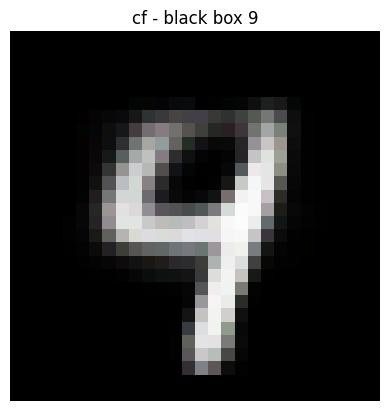

In [ ]:
from skimage.color import gray2rgb, rgb2gray
from skimage import feature, transform

from ilore.ilorem import ILOREM
from ilore.util import neuclidean



random_state = 1
dataset = 'mnist'
black_box = 'RF'

ae_name = 'aae'

path = '/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/ABELE_master/'
path_models = path + 'models/'
path_aemodels = path + 'aemodels/%s/%s/' % (dataset, ae_name)

black_box_filename = path_models + '%s_%s' % (dataset, black_box)

_, _, X_test, Y_test, use_rgb = get_dataset(dataset)
bb_predict, bb_predict_proba = get_black_box(black_box, black_box_filename, use_rgb)
ae = get_autoencoder(X_test, ae_name, dataset, path_aemodels)
ae.load_model()

class_name = 'class'
class_values = ['%s' % i for i in range(len(np.unique(Y_test)))]

i2e = 42
img = X_test[i2e]
label = Y_test[i2e]
explainer_bis = ILOREM(bb_predict, class_name, class_values, neigh_type='rnd', use_prob=True, size=100, ocr=0.1,
                    kernel_width=None, kernel=None, autoencoder=ae, use_rgb=use_rgb, valid_thr=0.5,
                    filter_crules=True, random_state=random_state, verbose=True, alpha1=0.5, alpha2=0.5,
                    metric=neuclidean, ngen=10, mutpb=0.2, cxpb=0.5, tournsize=3, halloffame_ratio=0.1,
                    bb_predict_proba=bb_predict_proba)

exp_bis = explainer_bis.explain_instance(img, num_samples=50, use_weights=True, metric=neuclidean)

print('e = {\n\tr = %s\n\tc = %s    \n}' % (exp_bis.rstr(), exp_bis.cstr()))
print(exp_bis.bb_pred, exp_bis.dt_pred, exp_bis.fidelity)
print(exp_bis.limg)

img2show, mask = exp_bis.get_image_rule(features=None, samples=10)
if use_rgb:
    plt.imshow(img2show, cmap='gray')
else:
    plt.imshow(img2show)
bbo = bb_predict(np.array([img2show]))[0]
plt.title('image to explain - black box %s' % bbo)
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/ABELE_master/aemodels/mnist/aae/explanation/img_to_explain_%s.png' % label, dpi=150)
#plt.show()

# if use_rgb:
#     plt.imshow(img2show, cmap='gray')
# else:
#     plt.imshow(img2show)

dx, dy = 0.05, 0.05
xx = np.arange(0.0, img2show.shape[1], dx)
yy = np.arange(0.0, img2show.shape[0], dy)
xmin, xmax, ymin, ymax = np.amin(xx), np.amax(xx), np.amin(yy), np.amax(yy)
extent = xmin, xmax, ymin, ymax
cmap_xi = plt.get_cmap('Greys_r')
cmap_xi.set_bad(alpha=0)

# Compute edges (to overlay to heatmaps later)
percentile = 100
dilation = 3.0
alpha = 0.8
xi_greyscale = img2show if len(img2show.shape) == 2 else np.mean(img2show, axis=-1)
in_image_upscaled = transform.rescale(xi_greyscale, dilation, mode='constant')
edges = feature.canny(in_image_upscaled).astype(float)
edges[edges < 0.5] = np.nan
edges[:5, :] = np.nan
edges[-5:, :] = np.nan
edges[:, :5] = np.nan
edges[:, -5:] = np.nan
overlay = edges

# abs_max = np.percentile(np.abs(data), percentile)
# abs_min = abs_max

# plt.pcolormesh(range(mask.shape[0]), range(mask.shape[1]), mask, cmap=plt.cm.BrBG, alpha=1, vmin=0, vmax=255)
plt.imshow(mask, extent=extent, cmap=plt.cm.BrBG, alpha=1, vmin=0, vmax=255)
plt.imshow(overlay, extent=extent, interpolation='none', cmap=cmap_xi, alpha=alpha)
plt.axis('off')
plt.title('attention area respecting latent rule')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/ABELE_master/aemodels/mnist/aae/explanation/saliency_%s.png' % label, dpi=150)
#plt.show()

# plt.figure(figsize=(12, 4))
# for i in range(latent_dim):
#     img2show, mask = exp.get_image_rule(features=[i], samples=10)
#     plt.subplot(1, 4, i+1)
#     if use_rgb:
#         plt.imshow(img2show)
#     else:
#         plt.imshow(img2show, cmap='gray')
#     plt.pcolormesh(range(mask.shape[0]), range(mask.shape[1]), mask, cmap=plt.cm.BrBG, alpha=1, vmin=0, vmax=255)
#     plt.title('varying dim %d' % i)
# plt.suptitle('attention area respecting latent rule')
# plt.show()
#
prototypes = exp_bis.get_prototypes_respecting_rule(num_prototypes=5 #, eps=255*0.25
                                                )
cont=0
for pimg in prototypes:
  bbo = bb_predict(np.array([pimg]))[0]
  if use_rgb:
    plt.imshow(pimg)
  else:
    plt.imshow(pimg.astype('uint8'), cmap='gray')
  plt.title('prototype %s' % bbo)
  plt.savefig('/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/ABELE_master/aemodels/mnist/aae/explanation/prototypes_%s_%s.png' % (label,cont), dpi=150)
  cont+=1
  #plt.show()
#
# prototypes, diff_list = exp.get_prototypes_respecting_rule(num_prototypes=5, return_diff=True)
# for pimg, diff in zip(prototypes, diff_list):
#     bbo = bb_predict(np.array([gray2rgb(pimg)]))[0]
#     plt.subplot(1, 2, 1)
#     if use_rgb:
#         plt.imshow(pimg)
#     else:
#         plt.imshow(pimg, cmap='gray')
#     plt.title('prototype %s' % bbo)
#     plt.subplot(1, 2, 2)
#     plt.title('differences')
#     if use_rgb:
#         plt.imshow(pimg)
#     else:
#         plt.imshow(pimg, cmap='gray')
#     plt.pcolormesh(range(diff.shape[0]), range(diff.shape[1]), diff, cmap=plt.cm.BrBG, alpha=1, vmin=0, vmax=255)
#     plt.show()
#
cprototypes = exp_bis.get_counterfactual_prototypes(eps=0.01)
cont=0
for cpimg in cprototypes:
  bboc = bb_predict(np.array([cpimg]))[0]
  if use_rgb:
    plt.imshow(cpimg)
  else:
    plt.imshow(cpimg, cmap='gray')
  plt.title('cf - black box %s' % bboc)
  plt.savefig('/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/ABELE_master/aemodels/mnist/aae/explanation/cprototypes_%s_%s.png' % (label,cont), dpi=150)
  cont+=1
  #plt.show()
#
# cprototypes_interp = exp.get_counterfactual_prototypes(eps=0.01, interp=5)
# for cpimg_interp in cprototypes_interp:
#     for i, cpimg in enumerate(cpimg_interp):
#         bboc = bb_predict(np.array([cpimg]))[0]
#         plt.subplot(1, 5, i+1)
#         if use_rgb:
#             plt.imshow(cpimg)
#         else:
#             plt.imshow(cpimg, cmap='gray')
#         plt.title('%s' % bboc)
#     fo = bb_predict(np.array([cpimg_interp[0]]))[0]
#     to = bb_predict(np.array([cpimg_interp[-1]]))[0]
#     plt.suptitle('black box - from %s to %s' % (fo, to))
#     plt.show()

In [ ]:
exp.Z

array([[-1.95908928e+00, -5.41599393e-01, -2.52701104e-01,
         1.29320252e+00],
       [ 3.19039096e-01, -2.49370375e-01,  1.46210794e+00,
        -2.06014071e+00],
       [-3.22417204e-01, -3.84054355e-01,  1.13376944e+00,
        -1.09989127e+00],
       [-1.72428208e-01, -8.77858418e-01,  4.22137467e-02,
         5.82815214e-01],
       [-1.10061918e+00,  1.14472371e+00,  9.01590721e-01,
         5.02494339e-01],
       [ 9.00855949e-01, -6.83727859e-01, -1.22890226e-01,
        -9.35769434e-01],
       [-2.67888080e-01,  5.30355467e-01, -6.91660752e-01,
        -3.96753527e-01],
       [-6.87172700e-01, -8.45205641e-01, -6.71246131e-01,
        -1.26645989e-02],
       [-1.11731035e+00,  2.34415698e-01,  1.65980218e+00,
         7.42044161e-01],
       [-1.91835552e-01, -8.87628964e-01, -7.47158294e-01,
         1.69245460e+00],
       [ 5.08077548e-02, -6.36995647e-01,  1.90915485e-01,
         2.10025514e+00],
       [ 1.20158952e-01,  6.17203110e-01,  3.00170320e-01,
      

In [ ]:
exp_bis.Z

array([[-1.95908213e+00, -5.41592836e-01, -2.52694070e-01,
         1.29320252e+00],
       [ 3.19039096e-01, -2.49370375e-01,  1.46210794e+00,
        -2.06014071e+00],
       [-3.22417204e-01, -3.84054355e-01,  1.13376944e+00,
        -1.09989127e+00],
       [-1.72428208e-01, -8.77858418e-01,  4.22137467e-02,
         5.82815214e-01],
       [-1.10061918e+00,  1.14472371e+00,  9.01590721e-01,
         5.02494339e-01],
       [ 9.00855949e-01, -6.83727859e-01, -1.22890226e-01,
        -9.35769434e-01],
       [-2.67888080e-01,  5.30355467e-01, -6.91660752e-01,
        -3.96753527e-01],
       [-6.87172700e-01, -8.45205641e-01, -6.71246131e-01,
        -1.26645989e-02],
       [-1.11731035e+00,  2.34415698e-01,  1.65980218e+00,
         7.42044161e-01],
       [-1.91835552e-01, -8.87628964e-01, -7.47158294e-01,
         1.69245460e+00],
       [ 5.08077548e-02, -6.36995647e-01,  1.90915485e-01,
         2.10025514e+00],
       [ 1.20158952e-01,  6.17203110e-01,  3.00170320e-01,
      

In [ ]:
def row_index(lst):
    row_index = []
    for i in range(len(lst)):
        row_index.append(lst[i][0])
    return row_index
# initializing list
test_list = exp.Z
test = row_index(test_list)

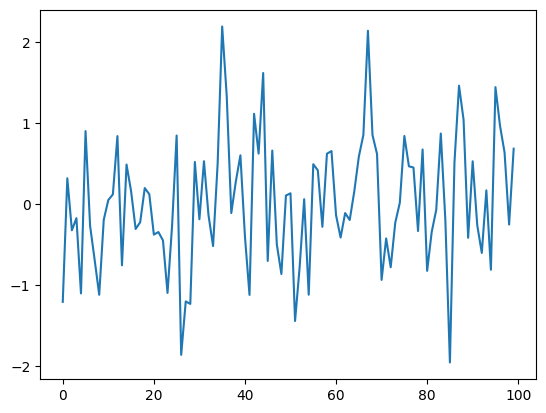

In [ ]:
import matplotlib.pyplot as plt

plt.plot(test)
plt.show()

In [ ]:
def row_index(lst):
    row_index = []
    for i in range(len(lst)):
        row_index.append(lst[i][0])
    return row_index
# initializing list
test_list = exp_bis.Z
test_bis = row_index(test_list)

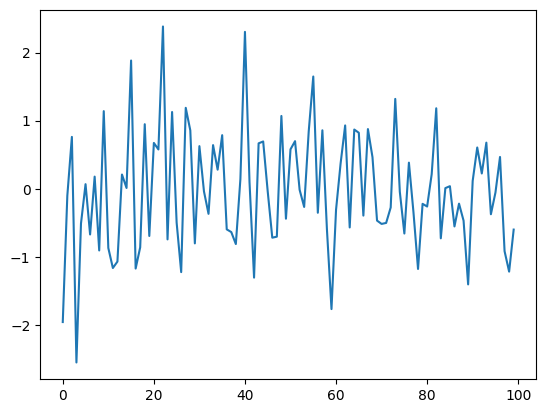

In [ ]:
import matplotlib.pyplot as plt

plt.plot(test_bis)
plt.show()

In [ ]:
exp.Z

array([[-1.20405173e+00, -1.89331830e-01, -5.99671125e-01,
         1.98165774e-01],
       [-1.03218852e-01,  4.10598502e-01,  1.44043571e-01,
         1.45427351e+00],
       [ 7.61037725e-01,  1.21675016e-01,  4.43863233e-01,
         3.33674327e-01],
       [-2.55298982e+00,  6.53618595e-01,  8.64436199e-01,
        -7.42165020e-01],
       [-5.10805138e-01, -1.18063218e+00, -2.81822283e-02,
         4.28331871e-01],
       [ 6.65172224e-02,  3.02471898e-01, -6.34322094e-01,
        -3.62741166e-01],
       [-6.72460448e-01, -3.59553162e-01, -8.13146282e-01,
        -1.72628260e+00],
       [ 1.77426142e-01, -4.01780936e-01, -1.63019835e+00,
         4.62782256e-01],
       [-9.07298364e-01,  5.19453958e-02,  7.29090562e-01,
         1.28982911e-01],
       [ 1.13940068e+00, -1.23482582e+00,  4.02341641e-01,
        -6.84810091e-01],
       [-8.70797149e-01, -5.78849665e-01, -3.11552532e-01,
         5.61653422e-02],
       [-1.16514984e+00,  9.00826487e-01,  4.65662440e-01,
      

In [ ]:
exp_bis.Z

array([[-1.95907414e+00, -5.41597962e-01, -2.52698332e-01,
         1.29321754e+00],
       [-1.03218852e-01,  4.10598502e-01,  1.44043571e-01,
         1.45427351e+00],
       [ 7.61037725e-01,  1.21675016e-01,  4.43863233e-01,
         3.33674327e-01],
       [-2.55298982e+00,  6.53618595e-01,  8.64436199e-01,
        -7.42165020e-01],
       [-5.10805138e-01, -1.18063218e+00, -2.81822283e-02,
         4.28331871e-01],
       [ 6.65172224e-02,  3.02471898e-01, -6.34322094e-01,
        -3.62741166e-01],
       [-6.72460448e-01, -3.59553162e-01, -8.13146282e-01,
        -1.72628260e+00],
       [ 1.77426142e-01, -4.01780936e-01, -1.63019835e+00,
         4.62782256e-01],
       [-9.07298364e-01,  5.19453958e-02,  7.29090562e-01,
         1.28982911e-01],
       [ 1.13940068e+00, -1.23482582e+00,  4.02341641e-01,
        -6.84810091e-01],
       [-8.70797149e-01, -5.78849665e-01, -3.11552532e-01,
         5.61653422e-02],
       [-1.16514984e+00,  9.00826487e-01,  4.65662440e-01,
      

In [ ]:
def get_min_at_each_index(lst):
    min_at_each_index = []
    for i in range(len(lst[0])):
        min_at_each_index.append(min(row[i] for row in lst))
    return min_at_each_index
# initializing list
test_list = exp.Z

# print result
print("The Minimum of each index list is : " , get_min_at_each_index(test_list))

The Minimum of each index list is :  [-1.9590892791748047, -2.2370865111124707, -2.1424667290773685, -2.094247816222812]


In [ ]:
def get_max_at_each_index(lst):
    max_at_each_index = []
    for i in range(len(lst[0])):
        max_at_each_index.append(max(row[i] for row in lst))
    return max_at_each_index
# initializing list
test_list = exp.Z

# print result
print("The Minimum of each index list is : " , get_max_at_each_index(test_list))

The Minimum of each index list is :  [2.1906997289697334, 1.956078903703642, 1.8347176266496867, 2.100255136478842]


In [ ]:
exp.limg

array([-1.959066  , -0.54159707, -0.25270042,  1.2932203 ], dtype=float32)